<a href="https://colab.research.google.com/github/2xazo/classification/blob/main/CustomerNet__Clustering__Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("customer_data.csv")
data.isnull().sum()

,0
name,0
age,0
gender,0
education,0
income,0
country,0
purchase_frequency,0
spending,0


In [ ]:
data.columns


Index(['name', 'age', 'gender', 'education', 'income', 'country',
       'purchase_frequency', 'spending'],
      dtype='object')

In [ ]:
data.describe()


,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [ ]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
education_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}

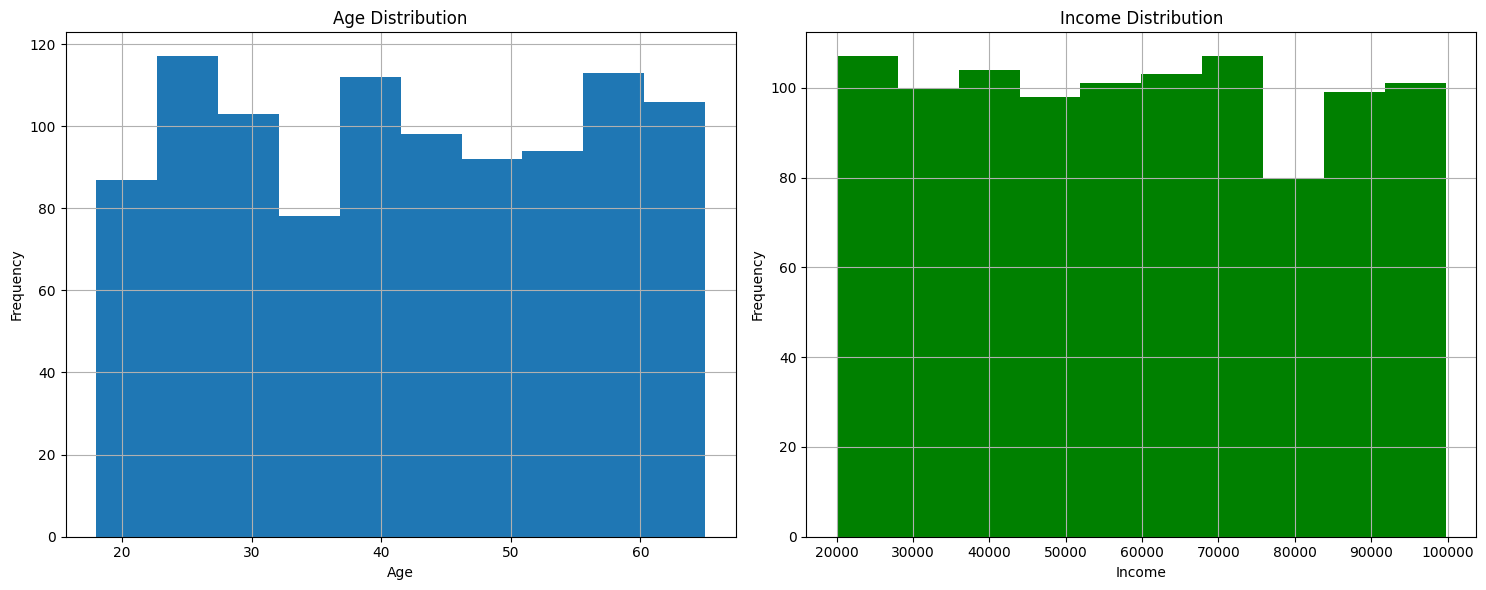

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
data['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
data['income'].hist(bins=10,color='green')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')

plt.tight_layout()
plt.show()

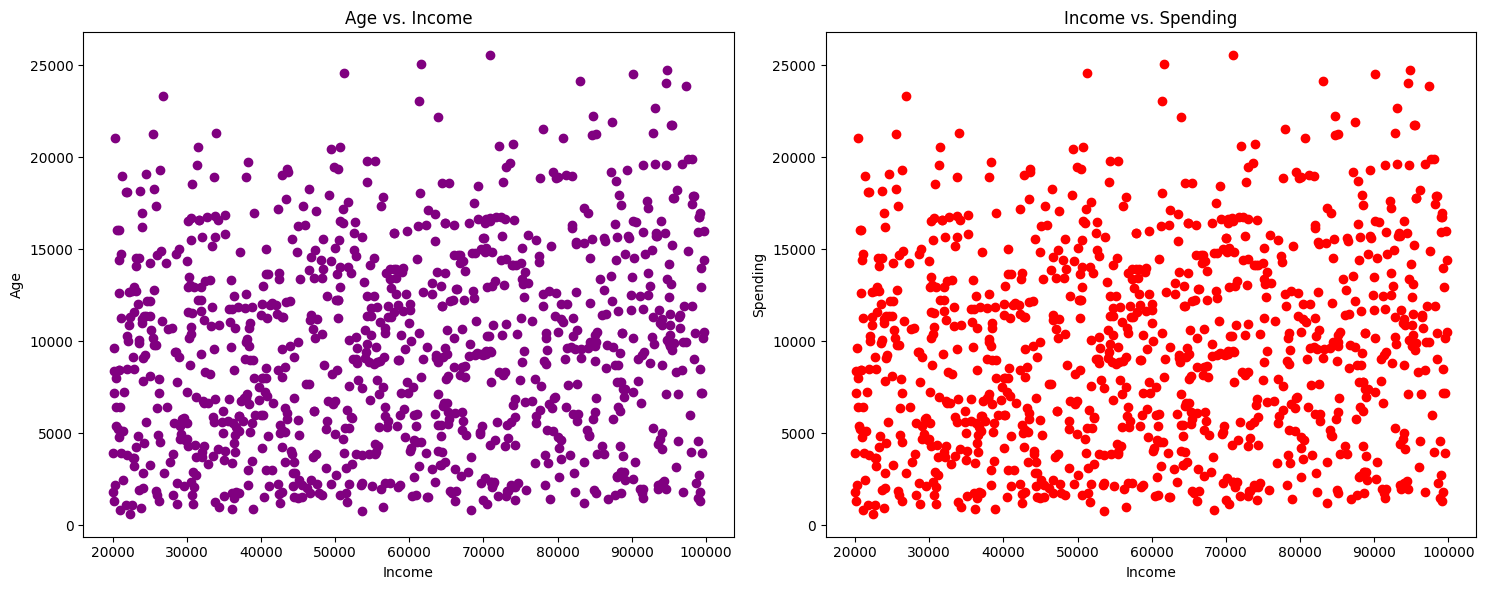

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

plt.scatter(data['income'], data['spending'], color='purple')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age vs. Income')

plt.subplot(1, 2, 2)

plt.scatter(data['income'], data['spending'], color='red')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Income vs. Spending')

plt.tight_layout()
plt.show()

In [ ]:
numerical_columns = ['age', 'income', 'spending','gender']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data[numerical_columns])
centroids = kmeans.cluster_centers_
print(kmeans.cluster_centers_)

[[ 0.42643031  0.34096306  0.97516401  1.002002  ]
 [-0.11374783 -0.91822189 -0.65298591 -0.998002  ]
 [ 0.84080691  0.24022468  0.64024713 -0.998002  ]
 [-0.90436232  0.90435524 -0.35177561 -0.77045663]
 [-0.28910399 -0.42610482 -0.62377881  1.002002  ]]


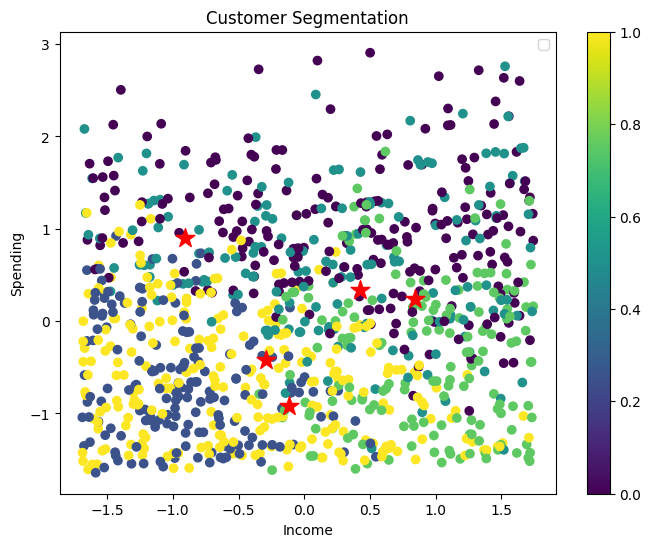

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['income'], data['spending'], c=data['cluster'], cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.legend()
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Customer Segmentation')
plt.colorbar()
plt.show()


In [ ]:
pca = PCA(n_components=2)
reduced_data= pca.fit_transform(data[['income','spending']])

kmeans=KMeans(n_clusters=3,random_state=42)
cluster_labels=kmeans.fit_predict(reduced_data)

centroids=kmeans.cluster_centers_

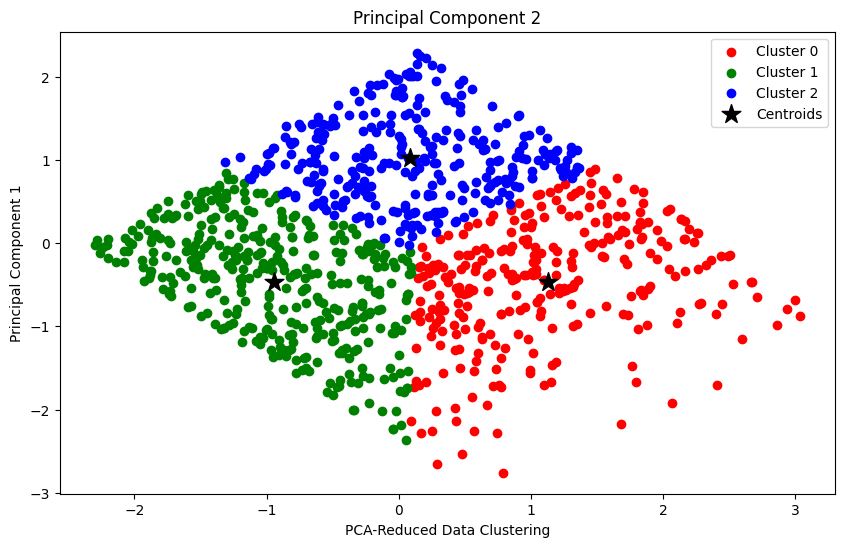

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i in range(3):
    plt.scatter(reduced_data[cluster_labels == i, 0], reduced_data[cluster_labels == i, 1], c=colors[i], label=f'Cluster {i}')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')


plt.xlabel('PCA-Reduced Data Clustering')
plt.ylabel('Principal Component 1')
plt.title('Principal Component 2')
plt.legend()
plt.show()